# **Boat Detection**

### Dataset Description: Boat Detection

**Author**: Muhammad Ali Mumtaz  
**Date created**: 11/06/2024  

**Dataset URL:** [Boat Detection Dataset on Roboflow](https://universe.roboflow.com/boatdetection-4xqod/boat-detection-xjflt/dataset/2)  


#### Overview
The Boat Detection dataset contains labeled images for training object detection models to recognize various types of boats and floating objects in aquatic environments.  

#### Categories
The dataset includes nine categories:  
1. Freight Boat  
2. Inflatable Boat  
3. Sail Boat  
4. Buoy  
5. Cruise Ship  
6. Ferry Boat  
7. Gondola  
8. Kayak  
9. Paper Boat  


#### Annotations
- Format: YOLOv8  
- Each image has a corresponding text file with bounding box coordinates and class labels.  

#### Usage
This dataset is suitable for training and evaluating object detection models for maritime surveillance, boat traffic monitoring, and aquatic environment analysis.  


### Download and Setup Boat Detection Dataset

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XNBHB7MRj5F6fleshccJ")
project = rf.workspace("boatdetection-4xqod").project("boat-detection-xjflt")
version = project.version(2)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycl

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Boat-Detection-2 in yolov8:: 100%|██████████| 2932/2932 [00:00<00:00, 4558.74it/s]


## Importing Libraries

In [ ]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split





# Check if Cuda is Available

In [1]:
import torch

print(f'{torch.cuda.is_available() = }')
print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = True
torch.cuda.device_count() = 1


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


### Visualize Bounding Boxes on Training Images

This code snippet loads an image from the training set and visualizes its corresponding bounding boxes. The bounding boxes are read from the label file and drawn on the image.

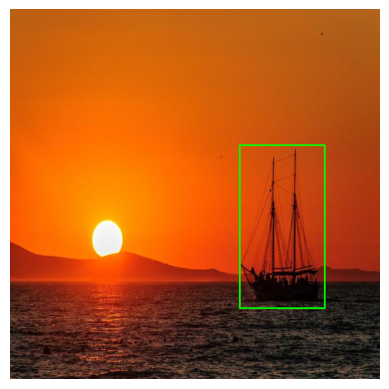

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory paths
image_dir = '/content/Boat-Detection-2/train/images'
label_dir = '/content/Boat-Detection-2/train/labels'

# Get the first image file
image_files = sorted(os.listdir(image_dir))
first_image_file = image_files[0]

# Construct paths for the image and its corresponding label
image_path = os.path.join(image_dir, first_image_file)
label_path = os.path.join(label_dir, os.path.splitext(first_image_file)[0] + '.txt')

# Load the image using OpenCV
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the label file to get bounding box information
with open(label_path, 'r') as f:
    lines = f.readlines()

# Plot the bounding box on the image
for line in lines:
    # Parse the label file line to extract bounding box information
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape

    # Convert YOLO format to bounding box format
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw the bounding box on the image using a green rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with bounding box using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()  # Display the image


### YOLOv8 Model Training

In [5]:
from ultralytics import YOLO

# Initialize the YOLO model with pre-trained weights
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 115MB/s]


In [7]:
# Define the content of the updated data.yaml
data_yaml_content = """
names:
  - Freight boat
  - Inflatable boat
  - Sail boat
  - buoy
  - cruise ship
  - ferry boat
  - gondola
  - kayak
  - paper boat
nc: 9
roboflow:
  license: CC BY 4.0
  project: boat-detection-xjflt
  url: https://universe.roboflow.com/boatdetection-4xqod/boat-detection-xjflt/dataset/2
  version: 2
  workspace: boatdetection-4xqod
test: /content/Boat-Detection-2/test/images
train: /content/Boat-Detection-2/train/images
val: /content/Boat-Detection-2/valid/images
"""

# Write the content to the data.yaml file
data_yaml_path = '/content/Boat-Detection-2/data.yaml'
with open(data_yaml_path, 'w') as file:
    file.write(data_yaml_content)

# Verify the file content
with open(data_yaml_path, 'r') as file:
    print(file.read())



names:
  - Freight boat
  - Inflatable boat
  - Sail boat
  - buoy
  - cruise ship
  - ferry boat
  - gondola
  - kayak
  - paper boat
nc: 9
roboflow:
  license: CC BY 4.0
  project: boat-detection-xjflt
  url: https://universe.roboflow.com/boatdetection-4xqod/boat-detection-xjflt/dataset/2
  version: 2
  workspace: boatdetection-4xqod
test: /content/Boat-Detection-2/test/images
train: /content/Boat-Detection-2/train/images
val: /content/Boat-Detection-2/valid/images



In [8]:
# Path to the dataset configuration file
data_config_path = '/content/Boat-Detection-2/data.yaml'

# Train the model with the specified parameters
model.train(
    data=data_config_path,  # Path to the dataset configuration file
    epochs=100,             # Number of training epochs
    batch=16,               # Batch size
    device='cuda',          # Use GPU for training
    imgsz=320,              # Image size (width and height) for training
    cache=True              # Cache images for faster training
)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Boat-Detection-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Boat-Detection-2/train/labels... 1021 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1021/1021 [00:01<00:00, 581.63it/s]


train: New cache created: /content/Boat-Detection-2/train/labels.cache


train: Caching images (0.3GB RAM): 100%|██████████| 1021/1021 [00:05<00:00, 189.67it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Boat-Detection-2/valid/labels... 293 images, 0 backgrounds, 0 corrupt: 100%|██████████| 293/293 [00:00<00:00, 384.34it/s]

val: New cache created: /content/Boat-Detection-2/valid/labels.cache



val: Caching images (0.1GB RAM): 100%|██████████| 293/293 [00:02<00:00, 124.59it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.656G      1.649      3.456      1.382         34        320: 100%|██████████| 64/64 [00:15<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]


                   all        293        517      0.857     0.0454       0.15     0.0958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.621G      1.588      2.262      1.339         61        320: 100%|██████████| 64/64 [00:12<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]

                   all        293        517      0.527       0.22      0.159     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.623G      1.541      1.934      1.342         52        320: 100%|██████████| 64/64 [00:08<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]


                   all        293        517      0.539      0.182      0.169     0.0932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.623G        1.5      1.803      1.304         35        320: 100%|██████████| 64/64 [00:08<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.95it/s]

                   all        293        517      0.534      0.213      0.207       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.625G      1.492      1.728      1.304         62        320: 100%|██████████| 64/64 [00:12<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]

                   all        293        517      0.569       0.25      0.264      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.623G      1.414      1.636      1.253         57        320: 100%|██████████| 64/64 [00:08<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]

                   all        293        517      0.608      0.223      0.247      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.623G      1.386      1.546       1.25         48        320: 100%|██████████| 64/64 [00:09<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]

                   all        293        517      0.676      0.233      0.248      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.623G       1.33      1.473      1.217         60        320: 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.91it/s]

                   all        293        517      0.574      0.262      0.298       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.621G      1.332      1.427      1.219         62        320: 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.22it/s]

                   all        293        517      0.534      0.292      0.273      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.623G      1.289      1.361      1.202         54        320: 100%|██████████| 64/64 [00:07<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.09it/s]

                   all        293        517      0.497      0.272      0.313      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.621G      1.263      1.327       1.19         61        320: 100%|██████████| 64/64 [00:11<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.13it/s]

                   all        293        517      0.513      0.315       0.35      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.621G      1.254      1.296      1.189         43        320: 100%|██████████| 64/64 [00:10<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.12it/s]

                   all        293        517      0.423      0.312      0.318      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.621G      1.227      1.239      1.168         66        320: 100%|██████████| 64/64 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]

                   all        293        517      0.636      0.269      0.304       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.623G      1.213      1.231      1.172         44        320: 100%|██████████| 64/64 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]

                   all        293        517      0.485      0.275      0.292      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.623G       1.19      1.179      1.149         73        320: 100%|██████████| 64/64 [00:10<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.40it/s]

                   all        293        517       0.55      0.316      0.332      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.621G      1.163      1.142      1.139         48        320: 100%|██████████| 64/64 [00:10<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.26it/s]

                   all        293        517      0.703      0.319      0.364      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.623G      1.143      1.117      1.136         59        320: 100%|██████████| 64/64 [00:07<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]

                   all        293        517      0.526      0.289      0.317      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.621G      1.159      1.109      1.141         39        320: 100%|██████████| 64/64 [00:10<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.16it/s]

                   all        293        517      0.438      0.331      0.326      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.612G      1.119       1.08       1.12         68        320: 100%|██████████| 64/64 [00:11<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.00it/s]

                   all        293        517      0.668      0.311      0.391      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.625G      1.099      1.067      1.127         50        320: 100%|██████████| 64/64 [00:08<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]

                   all        293        517      0.668      0.302      0.386      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.612G      1.103      1.036      1.111         50        320: 100%|██████████| 64/64 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.32it/s]

                   all        293        517      0.307      0.343      0.335      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.612G      1.082      1.017      1.108         46        320: 100%|██████████| 64/64 [00:10<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.95it/s]

                   all        293        517      0.575      0.365      0.443       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.621G      1.062     0.9993      1.096         67        320: 100%|██████████| 64/64 [00:08<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.83it/s]

                   all        293        517      0.722      0.345      0.423      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.612G      1.086     0.9912      1.095         53        320: 100%|██████████| 64/64 [00:09<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]

                   all        293        517      0.594      0.388      0.412      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.612G      1.045     0.9545      1.081         64        320: 100%|██████████| 64/64 [00:11<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.34it/s]

                   all        293        517      0.483      0.403       0.41      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.612G      1.036     0.9186      1.077         56        320: 100%|██████████| 64/64 [00:07<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.15it/s]

                   all        293        517      0.455      0.406      0.394      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.621G      1.015     0.9422      1.072         43        320: 100%|██████████| 64/64 [00:09<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.30it/s]

                   all        293        517      0.446      0.367       0.38      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.612G      1.011     0.9282      1.073         39        320: 100%|██████████| 64/64 [00:10<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.16it/s]

                   all        293        517        0.5      0.387      0.412      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.612G     0.9949     0.8924      1.061         39        320: 100%|██████████| 64/64 [00:08<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.80it/s]

                   all        293        517      0.684      0.377      0.417      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.614G     0.9873     0.9061      1.065         40        320: 100%|██████████| 64/64 [00:08<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.86it/s]

                   all        293        517      0.687      0.386      0.426      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       0.6G      1.002     0.8876      1.062         53        320: 100%|██████████| 64/64 [00:10<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.37it/s]

                   all        293        517      0.678       0.34      0.392       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.614G     0.9668     0.8818      1.052         73        320: 100%|██████████| 64/64 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]


                   all        293        517      0.461      0.414      0.416      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.621G     0.9659     0.8777      1.054         56        320: 100%|██████████| 64/64 [00:08<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.80it/s]

                   all        293        517      0.477      0.374      0.414      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.621G      0.982     0.8794      1.056         54        320: 100%|██████████| 64/64 [00:13<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]

                   all        293        517       0.54      0.392      0.438      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       0.6G     0.9617     0.8389      1.045         41        320: 100%|██████████| 64/64 [00:13<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.13it/s]

                   all        293        517      0.511      0.361      0.404      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.612G     0.9269     0.8299      1.036         28        320: 100%|██████████| 64/64 [00:07<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

                   all        293        517      0.546      0.379      0.418      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.614G     0.9166     0.8119      1.032         54        320: 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]

                   all        293        517      0.503      0.439      0.439      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       0.6G     0.9348     0.8303      1.046         70        320: 100%|██████████| 64/64 [00:09<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.99it/s]

                   all        293        517      0.518      0.431      0.447      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.621G     0.9195     0.8079      1.038         54        320: 100%|██████████| 64/64 [00:07<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.51it/s]

                   all        293        517      0.447      0.462      0.463      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.612G     0.9189     0.7964      1.032         50        320: 100%|██████████| 64/64 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.00it/s]

                   all        293        517      0.608      0.394      0.432      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       0.6G     0.9098     0.7868      1.026         50        320: 100%|██████████| 64/64 [00:10<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        293        517      0.569      0.414      0.441      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.629G     0.8918     0.7868      1.023         61        320: 100%|██████████| 64/64 [00:08<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]

                   all        293        517      0.529      0.426      0.455      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       0.6G     0.8942     0.7635      1.023         39        320: 100%|██████████| 64/64 [00:09<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.46it/s]

                   all        293        517      0.758      0.411       0.47      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.612G     0.8716     0.7622      1.017         29        320: 100%|██████████| 64/64 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.28it/s]

                   all        293        517      0.656      0.408      0.466      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.612G     0.8964     0.7661      1.015         55        320: 100%|██████████| 64/64 [00:07<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.31it/s]

                   all        293        517      0.584      0.446      0.476      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.614G     0.8765     0.7417      1.014         33        320: 100%|██████████| 64/64 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.36it/s]

                   all        293        517      0.597      0.438      0.463      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       0.6G     0.8725     0.7471      1.022         40        320: 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.10it/s]

                   all        293        517      0.517      0.433      0.455      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.621G     0.8712     0.7502      1.021         41        320: 100%|██████████| 64/64 [00:07<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.07it/s]

                   all        293        517      0.627      0.419      0.462      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.621G      0.877     0.7266      1.023         42        320: 100%|██████████| 64/64 [00:09<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.22it/s]

                   all        293        517      0.569      0.448      0.448      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       0.6G     0.8381     0.7078      1.003         46        320: 100%|██████████| 64/64 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.98it/s]

                   all        293        517      0.703      0.459      0.464      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       0.6G     0.8478     0.7201      1.007         70        320: 100%|██████████| 64/64 [00:08<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.82it/s]

                   all        293        517      0.647       0.39      0.432      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.612G      0.838     0.7012     0.9943         60        320: 100%|██████████| 64/64 [00:09<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.22it/s]

                   all        293        517      0.778      0.409      0.477       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       0.6G     0.8297     0.6955     0.9971         59        320: 100%|██████████| 64/64 [00:10<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.91it/s]

                   all        293        517      0.545      0.406      0.429       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.598G     0.8171     0.6894     0.9966         62        320: 100%|██████████| 64/64 [00:08<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.84it/s]

                   all        293        517      0.511      0.424      0.427      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.612G     0.8293     0.6956     0.9994         60        320: 100%|██████████| 64/64 [00:14<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.10it/s]

                   all        293        517      0.619      0.412      0.454      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.612G     0.8278     0.6872     0.9955         63        320: 100%|██████████| 64/64 [00:11<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.38it/s]

                   all        293        517       0.66      0.366       0.44      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       0.6G     0.8052     0.6775     0.9922         44        320: 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.77it/s]

                   all        293        517      0.709      0.395      0.469      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.621G     0.8243     0.6853     0.9998         53        320: 100%|██████████| 64/64 [00:07<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]

                   all        293        517      0.583       0.43      0.482      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.598G     0.8149     0.6801     0.9939         77        320: 100%|██████████| 64/64 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.12it/s]

                   all        293        517      0.481      0.462      0.453      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.612G     0.8027     0.6674      0.993         70        320: 100%|██████████| 64/64 [00:10<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.35it/s]

                   all        293        517      0.535      0.477      0.485      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       0.6G     0.8093     0.6679     0.9914         61        320: 100%|██████████| 64/64 [00:09<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        293        517      0.525      0.462      0.483      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.612G     0.7908     0.6447     0.9846         52        320: 100%|██████████| 64/64 [00:08<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.20it/s]

                   all        293        517      0.581      0.425       0.49      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      0.61G     0.7894     0.6402     0.9782         49        320: 100%|██████████| 64/64 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.93it/s]

                   all        293        517      0.593      0.503        0.5      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.621G     0.8024      0.646     0.9885         61        320: 100%|██████████| 64/64 [00:10<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]

                   all        293        517      0.526      0.454      0.467      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.623G     0.7834     0.6394     0.9866         49        320: 100%|██████████| 64/64 [00:08<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]

                   all        293        517      0.561      0.435      0.488      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.612G     0.7692     0.6218      0.977         70        320: 100%|██████████| 64/64 [00:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.32it/s]

                   all        293        517      0.498      0.469      0.486      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.614G     0.7662     0.6277     0.9734         58        320: 100%|██████████| 64/64 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.33it/s]

                   all        293        517      0.522      0.444      0.475      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       0.6G     0.7498     0.6192     0.9699         66        320: 100%|██████████| 64/64 [00:08<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.69it/s]

                   all        293        517      0.454      0.504      0.499      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.621G     0.7627     0.6306      0.978         80        320: 100%|██████████| 64/64 [00:09<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.28it/s]

                   all        293        517      0.534      0.444      0.497      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.612G     0.7531     0.6052     0.9638         83        320: 100%|██████████| 64/64 [00:11<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.46it/s]

                   all        293        517      0.514      0.503      0.507       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.621G     0.7624     0.6122     0.9755         54        320: 100%|██████████| 64/64 [00:08<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

                   all        293        517      0.733      0.443      0.494      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.627G      0.745      0.608     0.9645         38        320: 100%|██████████| 64/64 [00:08<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.43it/s]

                   all        293        517      0.564      0.435      0.498      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.621G      0.723     0.5887     0.9658         56        320: 100%|██████████| 64/64 [00:12<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]

                   all        293        517      0.748       0.43      0.504      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.612G     0.7189     0.5939     0.9655         52        320: 100%|██████████| 64/64 [00:08<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]

                   all        293        517      0.567      0.431      0.503      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.598G     0.7209     0.5899     0.9616         40        320: 100%|██████████| 64/64 [00:12<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.58it/s]

                   all        293        517      0.642      0.429      0.507      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.598G     0.7199     0.5812     0.9652         46        320: 100%|██████████| 64/64 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.25it/s]

                   all        293        517      0.589      0.449      0.505      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.598G     0.7243     0.5767     0.9629         52        320: 100%|██████████| 64/64 [00:10<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.28it/s]

                   all        293        517      0.549      0.473       0.51      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.612G     0.7243      0.583     0.9558         51        320: 100%|██████████| 64/64 [00:08<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.03it/s]

                   all        293        517      0.732      0.462      0.513      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.612G     0.7116     0.5779     0.9608         48        320: 100%|██████████| 64/64 [00:10<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.02it/s]

                   all        293        517      0.761      0.449      0.498      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       0.6G      0.707     0.5803     0.9598         63        320: 100%|██████████| 64/64 [00:11<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.24it/s]

                   all        293        517      0.629      0.436      0.491      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.612G     0.6984     0.5659     0.9494         90        320: 100%|██████████| 64/64 [00:08<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.99it/s]

                   all        293        517      0.576       0.45      0.503      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.612G     0.7151     0.5699     0.9601         66        320: 100%|██████████| 64/64 [00:10<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.97it/s]

                   all        293        517      0.535      0.482      0.496      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.627G     0.7161     0.5868     0.9659         56        320: 100%|██████████| 64/64 [00:11<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]

                   all        293        517      0.492      0.506      0.494       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      0.61G     0.6969     0.5701     0.9566         32        320: 100%|██████████| 64/64 [00:08<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.79it/s]

                   all        293        517      0.559      0.451       0.48      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.621G     0.6859     0.5526     0.9444         38        320: 100%|██████████| 64/64 [00:09<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.21it/s]

                   all        293        517      0.538      0.471      0.505      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.612G     0.6782      0.545     0.9508         41        320: 100%|██████████| 64/64 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.29it/s]

                   all        293        517      0.542      0.469      0.508      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.621G     0.6759     0.5387     0.9493         48        320: 100%|██████████| 64/64 [00:08<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]

                   all        293        517       0.64      0.463      0.518      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.621G     0.6732     0.5398     0.9491         38        320: 100%|██████████| 64/64 [00:09<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.32it/s]

                   all        293        517      0.623      0.441      0.505      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       0.6G     0.6717     0.5446     0.9491        116        320: 100%|██████████| 64/64 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.88it/s]

                   all        293        517      0.616      0.459      0.509      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       0.6G     0.6496     0.5279     0.9381         44        320: 100%|██████████| 64/64 [00:09<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]

                   all        293        517      0.572      0.478      0.514      0.333


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.621G      1.022     0.8877      1.123         20        320: 100%|██████████| 64/64 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.13it/s]

                   all        293        517      0.665       0.45      0.481      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.623G      0.973     0.8047      1.091         29        320: 100%|██████████| 64/64 [00:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.05it/s]

                   all        293        517      0.667      0.486      0.497       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.621G      0.966     0.7789      1.073         17        320: 100%|██████████| 64/64 [00:10<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.61it/s]

                   all        293        517      0.608      0.485      0.494      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.621G     0.9499     0.7452      1.066         29        320: 100%|██████████| 64/64 [00:08<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.29it/s]

                   all        293        517      0.673       0.46      0.502      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.621G     0.9524     0.7471      1.064         25        320: 100%|██████████| 64/64 [00:12<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.45it/s]

                   all        293        517      0.661      0.482      0.514       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.623G      0.933     0.7354      1.068         18        320: 100%|██████████| 64/64 [00:12<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.89it/s]

                   all        293        517      0.634       0.51      0.509      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.621G     0.9191     0.6996      1.062         31        320: 100%|██████████| 64/64 [00:09<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]

                   all        293        517      0.684      0.517       0.52      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.621G     0.9077     0.7058      1.045         19        320: 100%|██████████| 64/64 [00:07<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.94it/s]

                   all        293        517      0.573      0.508      0.521      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.621G      0.922     0.7136      1.054         28        320: 100%|██████████| 64/64 [00:11<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.04it/s]

                   all        293        517       0.71      0.488       0.52      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.621G     0.9156     0.6922      1.052         29        320: 100%|██████████| 64/64 [00:09<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]

                   all        293        517       0.71      0.501       0.52      0.341



100 epochs completed in 0.348 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]


                   all        293        517      0.716        0.5       0.52      0.341
          Freight boat          9         24      0.647      0.154      0.264      0.177
       Inflatable boat          7          7          1          0     0.0143    0.00831
             Sail boat        114        177      0.814      0.669      0.771       0.48
                  buoy         14         36      0.655      0.194       0.26      0.119
           cruise ship         39         40      0.821      0.925      0.957       0.77
            ferry boat         19         20      0.548      0.667      0.551      0.353
               gondola         43         98      0.717      0.694      0.689      0.362
                 kayak         58        102      0.487      0.431      0.421      0.252
            paper boat         10         13      0.755      0.769      0.753      0.552
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7979c1139cf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [10]:
import pandas as pd

# Path to the training results CSV file
results_csv_path = '/content/runs/detect/train2/results.csv'

# Read the first few rows to inspect column names
metrics = pd.read_csv(results_csv_path)
print(metrics.head())


                     epoch           train/box_loss           train/cls_loss  \
0                        1                   1.6486                   3.4556   
1                        2                   1.5877                   2.2623   
2                        3                   1.5407                   1.9342   
3                        4                   1.4997                   1.8032   
4                        5                   1.4917                   1.7275   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.3819                  0.85675                  0.04538   
1                   1.3388                  0.52667                  0.22044   
2                   1.3418                  0.53851                  0.18181   
3                   1.3037                  0.53414                  0.21289   
4                   1.3041                  0.56935                  0.25044   

          metrics/mAP50(B)      metric

In [11]:
# Save the trained model
model.save('boat_detection_model.pt')

### YOLOv8 Prediction and Visualization

In [15]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def predict_and_plot(path_test_boat):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.

    Parameters:
    path_test_boat (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_boat, device='cpu')

    # Load the image using OpenCV
    image = cv2.imread(path_test_boat)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]
            # Get the class index of the prediction and convert to integer
            class_idx = int(box.cls[0])

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Get the class name from the model's class list
            class_name = model.names[class_idx]
            # Draw the class name and confidence score near the bounding box
            text = f'{class_name}: {confidence*100:.2f}%'
            cv2.putText(image, text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image


image 1/1 /content/Boat-Detection-2/test/images/albin-express-sailboat-regatta-top-mark-971506_jpg.rf.2a6b3b3d53577d75b91249c53a3f8bb8.jpg: 320x320 6 Sail boats, 1 buoy, 108.1ms
Speed: 4.2ms preprocess, 108.1ms inference, 15.4ms postprocess per image at shape (1, 3, 320, 320)


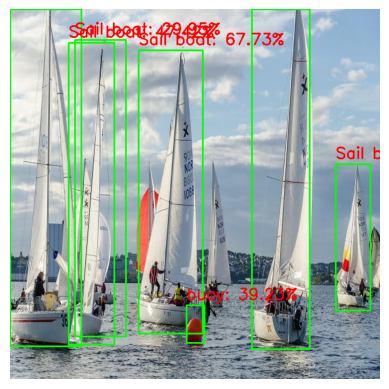

In [16]:
# Define the DataFrame 'test' with image paths
test = pd.DataFrame({'img_path': ['/content/Boat-Detection-2/test/images/albin-express-sailboat-regatta-top-mark-971506_jpg.rf.2a6b3b3d53577d75b91249c53a3f8bb8.jpg']})

# Call the predict_and_plot function with the first test image path
predict_and_plot(test.iloc[0]['img_path'])



image 1/1 /content/Boat-Detection-2/test/images/channel-venice-gondola-italy-water-656235_jpg.rf.d4376837dc3e2eac57c96f8356548dc6.jpg: 320x320 2 Sail boats, 3 gondolas, 67.3ms
Speed: 3.5ms preprocess, 67.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)


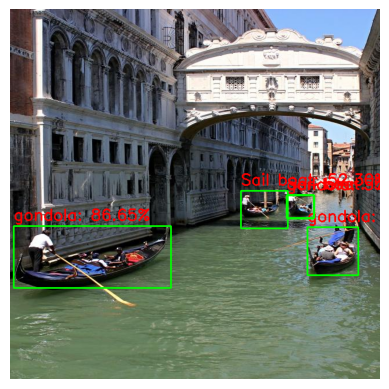

In [22]:
# Define the DataFrame 'test' with image paths
test = pd.DataFrame({'img_path': ['/content/Boat-Detection-2/test/images/channel-venice-gondola-italy-water-656235_jpg.rf.d4376837dc3e2eac57c96f8356548dc6.jpg']})
# Call the predict_and_plot function with the first test image path
predict_and_plot(test.iloc[0]['img_path'])


In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
